# The Stress Concentration, K, in Notched Bend Specimens

## Import packages and define equations

In [1]:
#Import packages and magic functions for Jupyter
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import integrate
import sympy as sym
from sympy import *

#Magic function to display plots inline in the Jupyter environment
%matplotlib inline

The purpose of this program is to solve for the stress concentration in a notched bend specimen.

In [2]:
from IPython.display import SVG, Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/0/0c/SingleEdgeNotchBending.svg', width = 400, height = 400)

The stress concentation range, $\Delta$K, to start a crack in aluminum alloys should be about **8 MPa**. For a stress ratio of **0.1**.

In [3]:
#Delta K, del_k (MPa)
del_k = 8
#Stress Ratio, R
R = 0.1

# del_k = kmax - kmin
# R = kmin/kmax

k_max, k_min, = symbols('k_max, k_min')

k_sol = solve((k_max - k_min - del_k, k_min/k_max - R), k_max, k_min)
solve((k_max - k_min - del_k, k_min/k_max - R), k_max, k_min)

{k_max: 8.88888888888889, k_min: 0.888888888888889}

In [4]:
#Print nice in sympy, prints variable when called without print function
sym.init_printing()

#Define symbols
a, W, Pq, S, B , z, Kq= sym.symbols("a,W,Pq,S,B,z,Kq")

f = sym.Function("f")

Coefficient $f$ for specimen geometetry based on the crack to width ratio, $\frac{a}{W}$

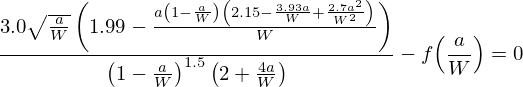

In [5]:
#Define and print coefficient f for notched bend specimen in terms of a and W

eq1 = 3.0*((sym.sqrt(a/W))*(1.99-((a/W)*(1-(a/W))*(2.15-(3.93*(a/W))+2.7*((a/W)**2)))) / ((2*(1+2*(a/W))*((1-(a/W))**(3/2))))) - f(a/W)

sym.Eq(eq1)

Create new variable, $z = \frac{a}{W}$, and simplify function for $f$

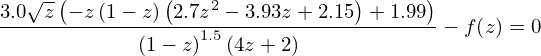

In [6]:
#Define and print coefficient f for notched bend specimen in terms of z (a/W)
eq2 = 3.0*((sym.sqrt(z))*(1.99-((z)*(1-(z))*(2.15-(3.93*(z))+2.7*((z)**2)))) / ((2*(1+2*(z))*((1-(z))**(3/2))))) - f(z)

sym.Eq(eq2)

Equation for stress concentraion, $K_q$, for a notched bend specimen

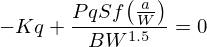

In [7]:
#Define and print equation for Kq in notched bend specimen
eq3 = (Pq*S/(B*(W**1.5)))*f(a/W) - Kq

sym.Eq(eq3)

Rearrange to solve for load, $P_q$

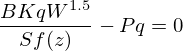

In [8]:
#Print reordered equation solving for Pq in notched bend specimen
eq4 = (Kq*(B*W**1.5))/(S*f(z)) - Pq

sym.Eq(eq4)

## Define Parameters

In [9]:
#Crack size in mm and m, a
a = 2
a = a/1000
#Specimen depth in mm and m, W
W = 12.6
W = W/1000
#Span of bend supports mm and m,S
S = 50.4
S = S/1000
#Specimen thickness mm and m, B
B = 6
B = B/1000

#Desired stress concentration in MPa and Pa, K
Kmax = k_sol[k_max]
Kmax = Kmax*(10**6)

Kmin = Kmax*R
Kmin = Kmin

In [10]:
#Print parameters
print("a = {} meters and {} mm".format(a,a*1000))
print("W = {} meters and {} mm".format(W,W*1000))
print("S = {} meters and {} mm".format(S,S*1000))
print("B = {} meters and {} mm".format(B,B*1000))
print("Kmax = {:.0f} Pa".format(Kmax))
print("Kmin = {:.0f} Pa".format(Kmin))
print("Kmax = {:.1f} MPa".format(Kmax/10**6))
print("Kmin = {:.1f} MPa".format(Kmin/10**6))

a = 0.002 meters and 2.0 mm
W = 0.0126 meters and 12.6 mm
S = 0.0504 meters and 50.4 mm
B = 0.006 meters and 6.0 mm
Kmax = 8888889 Pa
Kmin = 888889 Pa
Kmax = 8.9 MPa
Kmin = 0.9 MPa


In [11]:
#Define and print new variable z
z = a/W
print('z = {:.4f}'.format(z))

z = 0.1587


## Solution

Solve for $f$

In [12]:
f= 3.0*((sym.sqrt(a/W))*(1.99-((a/W)*(1-(a/W))*(2.15-(3.93*(a/W))+2.7*((a/W)**2)))) / ((2*(1+2*(a/W))*((1-(a/W))**(3/2)))))
print('f = {:.4f}'.format(f))

f = 1.0447


Confirmation of $f$ using $z$

In [13]:
f2= 3.0*((sym.sqrt(z))*(1.99-((z)*(1-(z))*(2.15-(3.93*(z))+2.7*((z)**2)))) / ((2*(1+2*(z))*((1-(z))**(3/2)))))
print('f2 = {:.4f}'.format(f2))

f2 = 1.0447


Solve for test load based upon $K_q$, $B$, $W$, $S$ and $f$

In [14]:
#Solve for test load Pq
Pmax = (Kmax*(B*W**1.5))/(S*f)
Pmin = (Kmin*(B*W**1.5))/(S*f)

print('Pmax = {:.2f} N'.format(Pmax))
print('Pmin = {:.2f} N'.format(Pmin))

Pmax = 1432.61 N
Pmin = 143.26 N


Define loading curve parameters

In [15]:
#Load wave frequency
frq = 10 #s^-1
#Wave amplitude
Amp = (Pmax - Pmin)/2
#Load wave mean
Mean = (Pmax + Pmin)/2
#Material
mat = "6061 Aluminum"

In [16]:
#Print parameters
print("R =",R)
print("Frequency = {:.0f} Hz".format(frq))
print("Pmax = {:.1f} N".format(Pmax))
print("Pmin = {:.1f} N".format(Pmin))
print("Amplitude = {:.1f} N".format(Amp))
print("Mean = {:.1f} N".format(Mean))

R = 0.1
Frequency = 10 Hz
Pmax = 1432.6 N
Pmin = 143.3 N
Amplitude = 644.7 N
Mean = 787.9 N


Plot the cyclic section of the loading curve

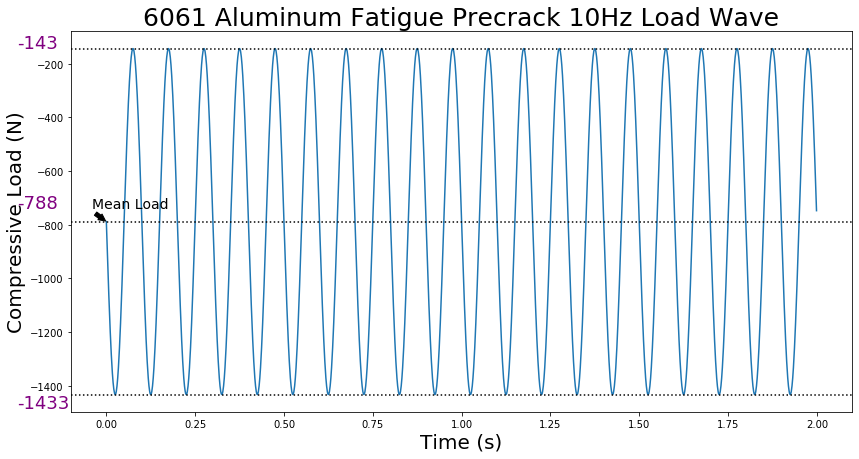

In [17]:
plt.figure(figsize=(14,7))

ramp_time = 10 #s

# Get x values of the sine wave
time = np.arange(0, 2, 0.001)

#ramp_time_rang = np.arange(0, ramp_time, 0.01)
#ramp_amp = (-Mean/ramp_time)*ramp_time_rang

# Amplitude of the sine wave
amplitude = -Amp*np.sin(frq*time*2*np.pi) - (Mean)
# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude)

#Step 1 Ramp
# plt.plot(ramp_time_rang, ramp_amp)
# Give a title for the sine wave plot

plt.title('{} Fatigue Precrack {}Hz Load Wave'.format(mat,frq), fontsize=25)
# Give x axis label for the sine wave plot
plt.xlabel('Time (s)', fontsize=20)
# Give y axis label for the sine wave plot
plt.ylabel('Compressive Load (N)', fontsize=20)
#Edit axis fontsize
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

#Additional annotaions
plt.axhline(y=-Mean, linestyle=':', color='k')
plt.annotate('Mean Load', xy=(0, -Mean), xytext=(-0.04, -Mean + 50),
            arrowprops=dict(facecolor='black', headwidth = 7, headlength = 7,shrink=0.05), fontsize=14)

#Additonal tick coordinate
xcoord = -0.25

#Y tick at mean load
plt.annotate('{:.0f}'.format(-Mean), xy=(0, -Mean), xytext=(xcoord, -Mean+50), color='purple', fontsize=18)
#Y tick and line at max load
plt.axhline(y=-Pmax,linestyle=':', color='k')
plt.annotate('{:.0f}'.format(-Pmax), xy=(0, -Pmin), xytext=(xcoord, -Pmax-50), color='purple', fontsize=18)
#Y tick and line at min load
plt.axhline(y=-Pmin,linestyle=':', color='k')
plt.annotate('{:.0f}'.format(-Pmin), xy=(0, -Pmin), xytext=(xcoord, -Pmin), color='purple', fontsize=18)

plt.savefig('{} Fatigue Curve.png'.format(mat))

## Crack Growth Rate

Import data from excel and display initial rows as pandas dataframe

In [18]:
import pandas as pd

crack_df = pd.read_csv('AF1-Crack Measurements.csv')

In [19]:
crack_df.head()

,Acetate Paper,Crack Length (um),Crack Length (mm),a (mm),Cycles,Cycles Since Last,Growth Rate
0,Act0,150,0.150,2.150,19976,NaN,NaN
1,Act1,209,0.209,2.209,20995,1019.0,0.057900
2,Act2,257,0.257,2.257,21985,990.0,0.048485
3,Act3,324,0.324,2.324,22999,1014.0,0.066075
4,Act4,424,0.424,2.424,24001,1002.0,0.099800


In [28]:
#Make array of crack length a in m
new_a_ar = np.asarray(crack_df["a (mm)"])/1000
print("Crack length, a = ", new_a_ar, "(m)")

Crack length, a =  [0.00215  0.002209 0.002257 0.002324 0.002424 0.002453 0.002488 0.002651
 0.002794 0.002908 0.003014 0.003115 0.003268 0.003355 0.00347  0.003552
 0.003765] (m)


In [21]:
#Define and print new variable z
z_list = []

for new_a in new_a_ar:
    z = new_a/W
    z_list.append(z)
strFormat = len(z_list) * '{:.4f} '
print("z = [", strFormat.format(*z_list), "]")

z = [ 0.1706 0.1753 0.1791 0.1844 0.1924 0.1947 0.1975 0.2104 0.2217 0.2308 0.2392 0.2472 0.2594 0.2663 0.2754 0.2819 0.2988  ]


In [22]:
#f= 3.0*((sym.sqrt(new_a_ar/W))*(1.99-((new_a_ar/W)*(1-(new_a_ar/W))*(2.15-(3.93*(new_a_ar/W))+2.7*((new_a_ar/W)**2)))) / ((2*(1+2*(new_a_ar/W))*((1-(new_a_ar/W))**(3/2)))))
f= 3.0*(((new_a_ar/W)**(0.5))*(1.99-((new_a_ar/W)*(1-(new_a_ar/W))*(2.15-(3.93*(new_a_ar/W))+2.7*((new_a_ar/W)**2)))) / ((2*(1+2*(new_a_ar/W))*((1-(new_a_ar/W))**(3/2)))))
strFormat = len(f) * '{:.4f} '
print("f = [", strFormat.format(*f), "]")

f = [ 1.0823 1.0970 1.1090 1.1257 1.1507 1.1580 1.1668 1.2081 1.2447 1.2744 1.3024 1.3295 1.3715 1.3958 1.4287 1.4526 1.5166  ]


In [23]:
#Solve for stress concentration, Kq
Kmax = ((Pmax*S)/(B*(W**1.5)))*f
Kmin = ((Pmin*S)/(B*(W**1.5)))*f
delk = Kmax - Kmin

strFormat = len(Kmax) * '{:.2f} '
print("Kmax = [", strFormat.format(*Kmax/10**6), "] (MPa*\u221Am)")
print("Kmin = [", strFormat.format(*Kmin/10**6), "] (MPa*\u221Am)")
print("delk = [", strFormat.format(*delk/10**6), "] (MPa*\u221Am)")

# print(Kmax/10**6)
# print(Kmin/10**6)
# print(delk/10**6)

Kmax = [ 9.21 9.33 9.44 9.58 9.79 9.85 9.93 10.28 10.59 10.84 11.08 11.31 11.67 11.88 12.16 12.36 12.90  ] (MPa*√m)
Kmin = [ 0.92 0.93 0.94 0.96 0.98 0.99 0.99 1.03 1.06 1.08 1.11 1.13 1.17 1.19 1.22 1.24 1.29  ] (MPa*√m)
delk = [ 8.29 8.40 8.49 8.62 8.81 8.87 8.94 9.25 9.53 9.76 9.97 10.18 10.50 10.69 10.94 11.12 11.61  ] (MPa*√m)


In [24]:
#Crack growth rate array
#Crack growth rate in um/cycle
crak_rat = crack_df['Growth Rate']
#Crack growth rate in m/cycle
crak_rat_m = crak_rat*10**-6

Plot crack growth rate $\frac{\Delta a}{\Delta N}$ (nm/cycle) versus change in stress intensity, $\Delta K$ (MPa)

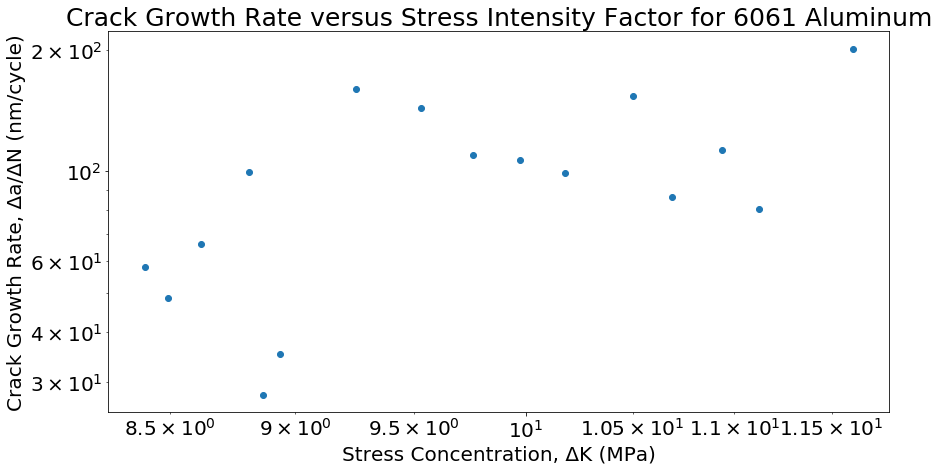

In [25]:
#Plot crack growth rate (nm/s) versus stress intensity (MPa

#Set figure size
plt.figure(figsize=(14,7))
#Scatter plot of 
plt.scatter(delk*10**-6, crak_rat*1000)

#Change to log scale
plt.yscale('log')
plt.xscale('log')

# Give a title for the sine wave plot
plt.title('Crack Growth Rate versus Stress Intensity Factor for {}'.format(mat), fontsize=25)
# Give x axis label for the sine wave plot
plt.xlabel('Stress Concentration, \u0394K (MPa)', fontsize=20)
# Give y axis label for the sine wave plot
plt.ylabel('Crack Growth Rate, \u0394a/\u0394N (nm/cycle)', fontsize=20)
#Edit axis fontsize
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.savefig('Crack Growth Rate versus Stress Concentration for {}'.format(mat))

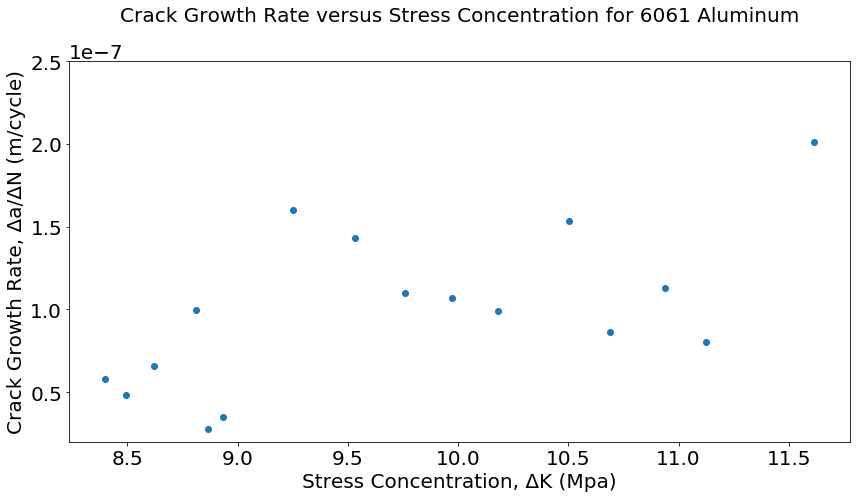

In [26]:
#Set figure size
plt.figure(figsize=(14,7))
#Scatterplot
plt.scatter(delk/10**6, crak_rat_m)

#Change y axis limits
plt.ylim(0.02*10**-6, 0.25*10**-6)

# Give a title for the plot
plt.title('Crack Growth Rate versus Stress Concentration for {}'.format(mat), pad=40, fontsize=20)
# Give x axis label for the sine wave plot
plt.xlabel('Stress Concentration, \u0394K (Mpa)', fontsize=20)
# Give y axis label for the sine wave plot
plt.ylabel('Crack Growth Rate, \u0394a/\u0394N (m/cycle)', fontsize=20)
#Edit axis fontsize
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

#plt.savefig('Crack Growth Rate versus Stress Concentration for {}'.format(mat))

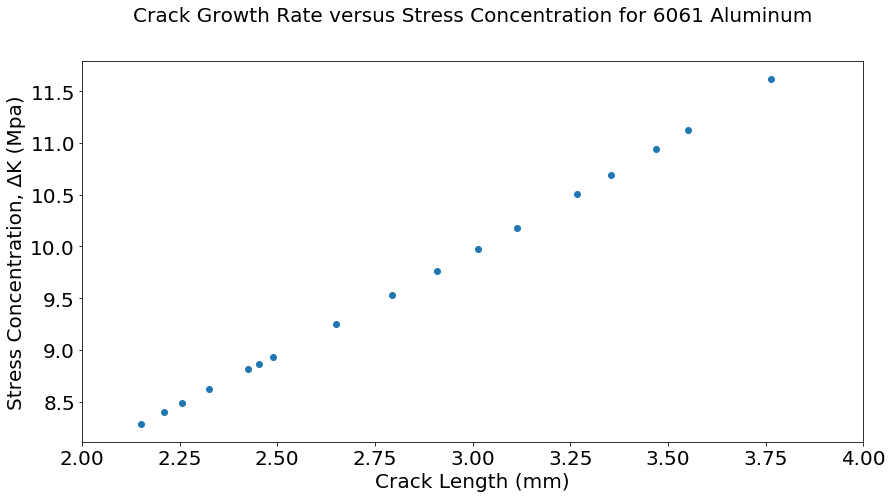

In [27]:
#Set figure size
plt.figure(figsize=(14,7))
#Scatterplot
plt.scatter(new_a_ar*1000, delk/10**6)

#Change axis limits
#plt.ylim(0.02*10**-6, 0.25*10**-6)
plt.xlim(2, 4)

# Give a title for the plot
plt.title('Crack Growth Rate versus Stress Concentration for {}'.format(mat), pad=40, fontsize=20)
# Give x axis label for the sine wave plot
plt.xlabel('Crack Length (mm)', fontsize=20)
# Give y axis label for the sine wave plot
plt.ylabel('Stress Concentration, \u0394K (Mpa)', fontsize=20)
#Edit axis fontsize
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)